In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from specim.specfuncs import spec1d

In [2]:
data =  spec1d.Spec1d('../B0712_lens_spec.txt')
lamda_galaxy = data['wav'][575:]
spectra_galaxy = data['flux'][575:]
variance_spectra_galaxy = data['var'][575:]
#sky_spectra_galaxy = data['sky']


Reading spectrum from ../B0712_lens_spec.txt
Expected file format: text
 Spectrum Start:  3592.98
 Spectrum End:     8588.21
 Dispersion (1st pixel):   2.44
 Dispersion (average):      2.44



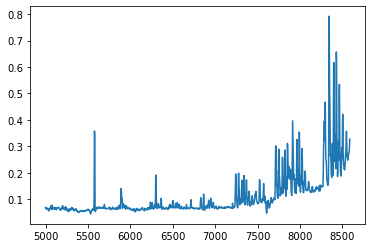

In [3]:
#%matplotlib notebook
#plt.plot(lamda_galaxy, sky_spectra_galaxy)
plt.plot(lamda_galaxy, variance_spectra_galaxy)

### Below is the list of sky lines (in terms of wavelength) we would like to fit with a Gaussian distribution. The tuples contains start and end value of the wavelength range for thses sky lines. However they are not the exact wavelength data points in the spectra as we have collected these wavelength values from the zoomed out plot of the emission lines. So we have to replace these wavelength values with the closest wavelengths values from the spectra.

In [4]:
sky_lines = [(5567.59, 5586.75), (6292.11, 6312.28), (6702.74, 6726.82), (6855.35, 6874.21), 
             (7333.14, 7347.22), (7561.88, 7579.46), (7813.72, 7828.62), (7984.77, 8002.12), 
             (8393.06, 8408.45), (8458.34, 8474.83)]

#(7308.15, 7322.96),(7229.29, 7258.61),(7907.52, 7926.18), (7512.07, 7537.9), 
#(8421.85, 8441.42), (7958.35, 7972.66),(7786.63, 7801.62),

In [5]:
exact_sky_lines = []
index = []
for i,p in enumerate(sky_lines):
    a = abs(lamda_galaxy - p[0])
    b = abs(lamda_galaxy - p[1])
    a_list = a.tolist()
    b_list = b.tolist()
    start = lamda_galaxy[a_list.index(min(a))]
    stop = lamda_galaxy[b_list.index(min(b))]
    exact_sky_lines.append((start, stop))
    index.append((a_list.index(min(a)), b_list.index(min(b))))

In [6]:
print("sky_lines : \n")
[print(*line) for line in sky_lines]
print("\nexact_sky_lines : \n")
[print(*line) for line in exact_sky_lines]

sky_lines : 

5567.59 5586.75
6292.11 6312.28
6702.74 6726.82
6855.35 6874.21
7333.14 7347.22
7561.88 7579.46
7813.72 7828.62
7984.77 8002.12
8393.06 8408.45
8458.34 8474.83

exact_sky_lines : 

5566.64 5586.18
6292.11 6311.65
6702.48 6726.9
6856.36 6873.46
7332.68 7347.34
7562.29 7579.39
7813.88 7828.54
7984.87 8001.97
8392.79 8407.45
8458.75 8475.84


[None, None, None, None, None, None, None, None, None, None]

In [7]:
# empty list to contain data of these sky lines 
data_sky_line = []           
lamda_sky_line = [] 

### Collecting the variance on spectra data for specific range of wavelengths of the sky lines to fit with Gaussian distribution.

In [8]:
lam_list = lamda_galaxy.tolist()                   # converting array to list
variance_spec_list = variance_spectra_galaxy.tolist()   # contains variance on spectra data

for i,p in enumerate(exact_sky_lines):
    start = lam_list.index(p[0])
    stop  = lam_list.index(p[1])
    sky_spec = variance_spec_list[start:stop+1]   # slicing and collecting data for the wavelength range
    lam = lam_list[start:stop+1]
    data_sky_line.append(sky_spec)
    lamda_sky_line.append(lam)

### Here is the plot of emission lines we are going to fit

[5576.41  6301.88  6714.69  6864.91  7340.01  7570.84  7821.21  7993.42
 8400.12  8467.295]


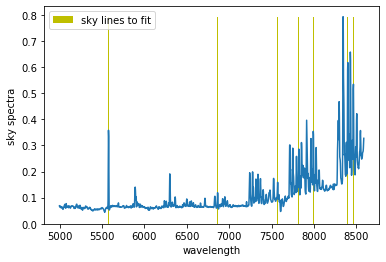

In [9]:
s = np.zeros(len(lamda_sky_line))
w = np.zeros(len(lamda_sky_line))
for i,p in enumerate(lamda_sky_line):
    s[i]= np.median(p)
    if len(p) >= 10.0:
        w[i]= len(p)
    else:
        w[i]= 10.0 
print(s)
plt.plot(lamda_galaxy, variance_spectra_galaxy)
plt.bar(s, height=max(variance_spectra_galaxy), width=w, color='y', label='sky lines to fit')
plt.xlabel('wavelength')
plt.ylabel('sky spectra')
plt.legend()
plt.show()

In [10]:
model_gauss = models.Gaussian1D()           # calling the Gaussian model 
fitter_gauss = fitting.LevMarLSQFitter()    # Calling the fitting scheme 

###  Here we are going to fit each sky line data individually. Before fit we have normalized the flux with the median value of the data of each sky lines. Then we have shifted both the x and y axis of the data. The y axis has been shifted by subtracting the minimum value of the data array so that it touch the x axis. And the x axis has been shifted by the median value of the data array.

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean             stddev      
    ----------------- ----------------- ------------------
    3.702790331581665 0.798720188347353 2.8051523881001725


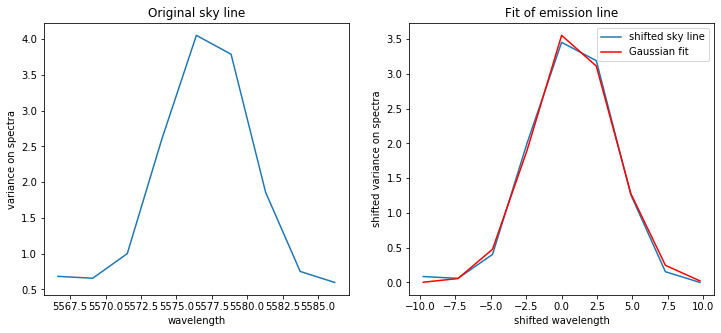

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
    ----------------- ------------------- ------------------
    1.376660746160172 -1.2583222377320238 3.1984459113133803


<Figure size 432x288 with 0 Axes>

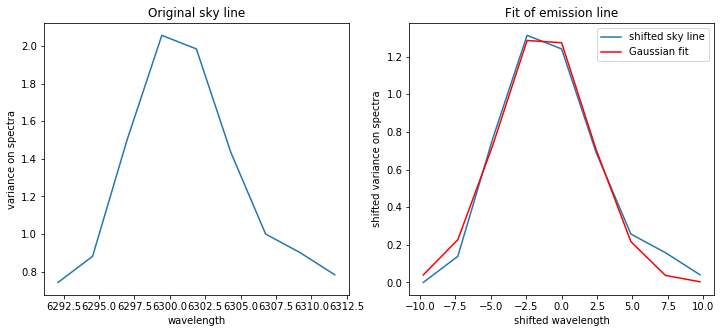

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean               stddev     
    ----------------- --------------------- -----------------
    0.466112645353874 -0.004666651170372567 3.500729250728919


<Figure size 432x288 with 0 Axes>

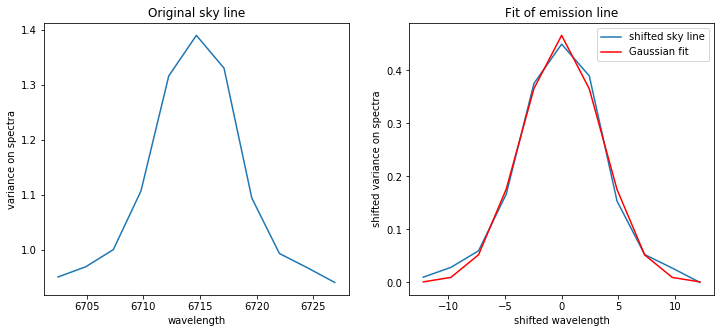

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
    ------------------ ------------------ ------------------
    0.8129244282467346 -1.133827810195201 3.3047407830952076


<Figure size 432x288 with 0 Axes>

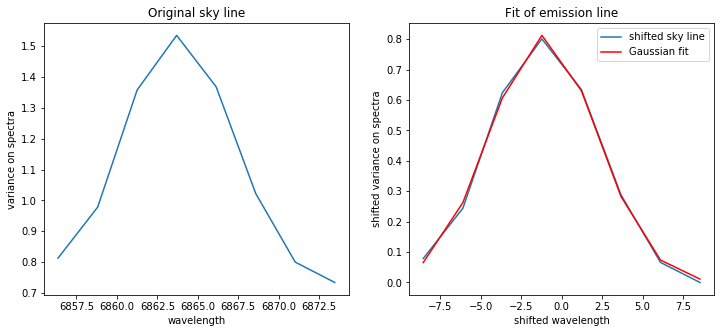

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev     
    ------------------ ------------------ -----------------
    0.7921239126124593 0.8480663544756666 2.773521319117307


<Figure size 432x288 with 0 Axes>

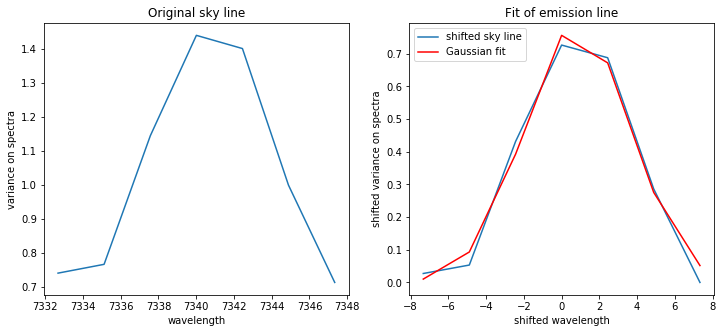

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean              stddev      
    ----------------- ------------------ ------------------
    0.586464297340743 0.8237564031906541 3.0220743881602803


<Figure size 432x288 with 0 Axes>

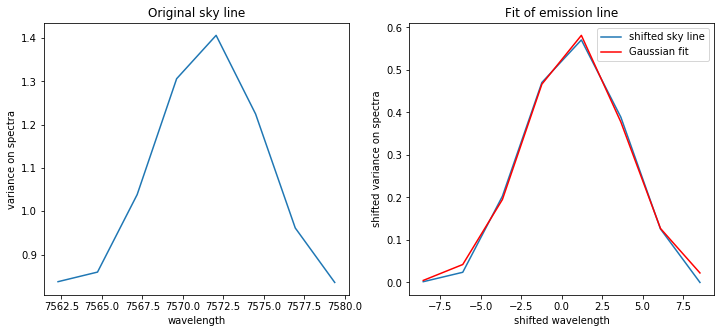

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean              stddev     
    ------------------ ------------------- -----------------
    0.8774674620508806 0.09676371279166802 2.927921846758296


<Figure size 432x288 with 0 Axes>

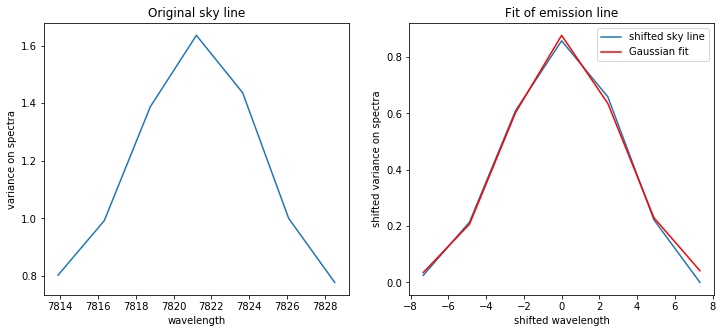

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean              stddev      
    ------------------ ------------------- ------------------
    1.0407265198466844 -0.2810923804552462 3.0240131408124022


<Figure size 432x288 with 0 Axes>

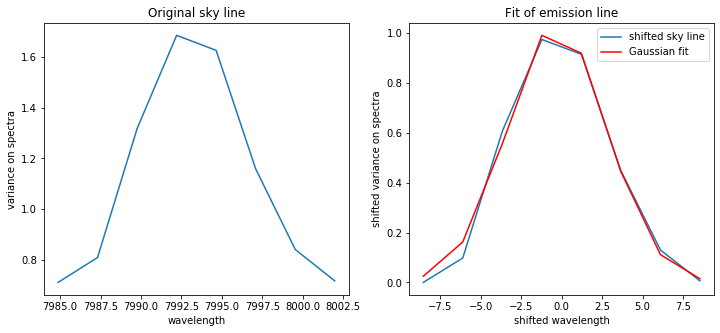

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean              stddev     
    ------------------ ------------------- -----------------
    1.0129467783535315 -0.9042374026127082 3.043053165467442


<Figure size 432x288 with 0 Axes>

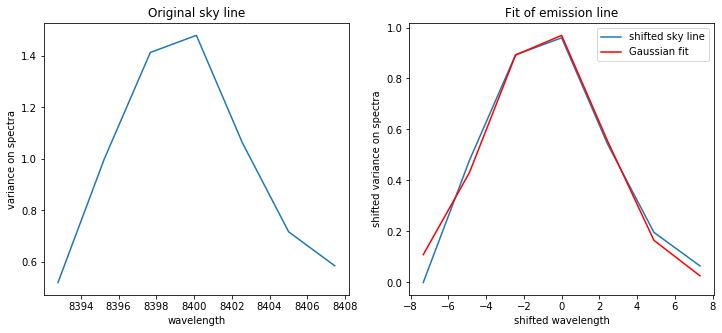

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
    ------------------ ------------------ ------------------
    0.9417007637779721 -2.013604283800249 3.0391474083629912


<Figure size 432x288 with 0 Axes>

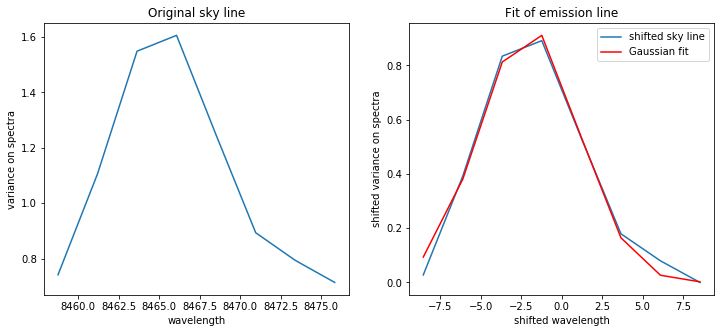

<Figure size 432x288 with 0 Axes>

In [11]:
best_fit = []
for i,p in enumerate(data_sky_line):
    data_sky_line[i] = data_sky_line[i] / np.median(data_sky_line[i])
    x= lamda_sky_line[i] - np.median(lamda_sky_line[i])
    y= data_sky_line[i] - np.min(data_sky_line[i])
    
    best_fit_gauss = fitter_gauss(model_gauss, x, y)
    best_fit.append(best_fit_gauss)
    
    print(best_fit_gauss)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(lamda_sky_line[i], data_sky_line[i])
    ax1.set_title('Original sky line')
    ax1.set_xlabel('wavelength')
    ax1.set_ylabel('variance on spectra')
    
     
    ax2.plot(x, y, label='shifted sky line') 
    ax2.plot(x, best_fit_gauss(x), 'r', label='Gaussian fit')
    ax2.set_title('Fit of emission line')
    ax2.set_xlabel('shifted wavelength')
    ax2.set_ylabel('shifted variance on spectra')
    plt.legend()
    plt.show()
    plt.figure()

In [12]:
# Calculating the average value of the std_dev.
s= 0
for i,p in enumerate(best_fit):
    s += p.stddev.value
    #print(i)
print('average : %f' %(s/ (i+1)))

average : 3.063880


(5.0, 10.0)

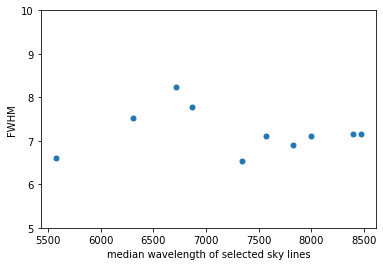

In [13]:
wav = np.zeros(len(lamda_sky_line))
fwhm = np.zeros(len(lamda_sky_line))
for i,p in enumerate(lamda_sky_line):
    wav[i] = np.median(p)
    fwhm[i] = best_fit[i].stddev.value * 2.355
plt.plot(wav, fwhm, '.', ms=10)
plt.xlabel('median wavelength of selected sky lines')
plt.ylabel('FWHM')
plt.ylim(5.0, 10.0)